In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Useful functions to plot and generate problem instances

In [2]:
def generate_tsp_instance(number_of_cities, grid_size):
    ans = []
    while len(ans) < number_of_cities:
        (x, y) = randint(0, grid_size, size=2)
        if (x, y) not in ans:
            ans.append((x, y))
    return ans

In [3]:
def plot_instance(instance, grid_size):
    plt.close()
    for i, city in enumerate(instance):
        plt.plot(city[0], city[1], 'o', color='red')
        plt.annotate(i, xy=(city[0], city[1]), xytext=(-8, 8),
        textcoords='offset points')
    plt.grid()
    plt.xlim((-0.5, grid_size+0.5))
    plt.ylim((-0.5, grid_size+0.5))

In [4]:
def plot_tour(instance, grid_size, tour):
    plt.close()
    plot_instance(instance, grid_size)
    for i in range(0, len(tour)-1):
        x = tsp_instance[tour[i]][0] 
        y = tsp_instance[tour[i]][1] 
        dx = tsp_instance[tour[i+1]][0] -x 
        dy = tsp_instance[tour[i+1]][1] -y
        plt.arrow(x, y, dx, dy, color='blue')
    x = tsp_instance[tour[-1]][0] 
    y = tsp_instance[tour[-1]][1] 
    dx = tsp_instance[tour[0]][0] -x 
    dy = tsp_instance[tour[0]][1] -y
    plt.arrow(x, y, dx, dy, color='blue')

### Generate an instance of TSP

In [5]:
number_of_cities = 20
grid_size = 100
tsp_instance = generate_tsp_instance(number_of_cities, grid_size)

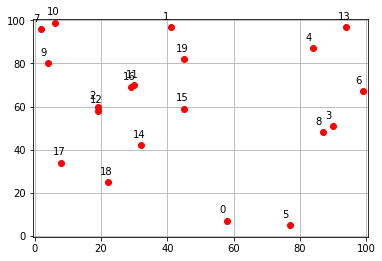

In [6]:
plot_instance(tsp_instance, grid_size)

### Generate and plot a random tour

In [7]:
tour = np.random.permutation(number_of_cities)
tour

array([ 8,  4,  6, 18,  9, 14,  5, 15, 19, 16,  2, 12, 17, 13,  3,  7,  1,
       11,  0, 10])

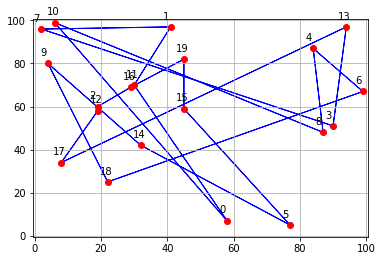

In [8]:
plot_tour(tsp_instance, grid_size, tour)

### Quantify tours -- distance

In [9]:
def distance(city1, city2):
    x_distance = abs(city1[0] - city2[0])
    y_distance = abs(city1[1] - city2[1])
    return np.sqrt(x_distance**2 + y_distance**2)

In [10]:
def cost(tour, tsp_instance):
    cost = 0
    for i in range(0, len(tour)-1):
        cost += distance(tsp_instance[tour[i]], tsp_instance[tour[i+1]])
    cost += distance(tsp_instance[tour[-1]], tsp_instance[tour[0]])
    return cost

### Perturbantion of tours

In [11]:
def perturb(tour):
    # choose two cities at random
    i, j = np.random.choice(len(tour), 2, replace=False)
    new_tour = np.copy(tour)
    # swap them
    new_tour[i], new_tour[j] =  new_tour[j], new_tour[i]
    return new_tour

In [12]:
another_tour = perturb(tour)

In [13]:
another_tour

array([ 8,  4,  6, 18,  9, 14,  5, 15, 19, 16,  2,  0, 17, 13,  3,  7,  1,
       11, 12, 10])

In [14]:
cost(another_tour, tsp_instance)

1032.4158001731248

### Crossover

In [15]:
tour

array([ 8,  4,  6, 18,  9, 14,  5, 15, 19, 16,  2, 12, 17, 13,  3,  7,  1,
       11,  0, 10])

In [16]:
another_tour

array([ 8,  4,  6, 18,  9, 14,  5, 15, 19, 16,  2,  0, 17, 13,  3,  7,  1,
       11, 12, 10])

In [17]:
def crossover(tour_a, tour_b):
    cuttoff = np.random.randint(0, len(tour_a))
    ans = []
    for i in range(0, cuttoff):
        ans.append(tour_a[i])
    i = 0
    while len(ans) < len(tour_a):
        if tour_b[i] not in ans:
            ans.append(tour_b[i])
        i += 1
    return np.array(ans)

In [19]:
crossover(tour, another_tour)

array([ 8,  4,  6, 18,  9, 14,  5, 15, 19, 16,  2,  0, 17, 13,  3,  7,  1,
       11, 12, 10])

In [20]:
def initialise_population(number_of_cities, population_size):
    pop = []
    for _ in range(population_size):
        pop.append(np.random.permutation(number_of_cities))
    return pop

In [21]:
initialise_population(3, population_size=5)

[array([1, 2, 0]),
 array([2, 0, 1]),
 array([0, 1, 2]),
 array([0, 2, 1]),
 array([2, 1, 0])]

In [22]:
def genetic_algorithm(tsp_instance, population_size,number_of_generations, mutation_prob, crossover_prob):
    number_of_cities = len(tsp_instance)
    pop = initialise_population(number_of_cities, population_size)
    #compute fitness
    cost_values = np.array([cost(x, tsp_instance) for x in pop])
    fitness = 1.0/cost_values
    fitness_probability = fitness/(np.sum(fitness))
    for _ in range(number_of_generations):
        # create a new population
        new_pop = []
        fittest = pop[argmax(fitness)]
        new_pop.append(np.copy(fittest)) #always take fittes
        for _ in range(population_size-1):
            parent_index = np.random.choice(range(population_size), p = fitness_probability)
            parent = pop[parent_index]
            # sometimes mutate
            if rand() < mutation_prob:
                mutant = perturb(parent.copy())
                new_pop.append(mutant)
            # sometimes crossover 
            elif rand() < crossover_prob:
                another_parent_index = np.random.choice(range(population_size), p = fitness_probability)
                another_parent = pop[another_parent_index]
                new_pop.append(crossover(parent, another_parent))
            # most times just copy the parent
            else:
                new_pop.append(parent.copy())
        pop = new_pop
        #compute fitness
        cost_values = np.array([cost(x, tsp_instance) for x in pop])
        fitness = 1.0/cost_values
        fitness_probability = fitness/(np.sum(fitness))
    best = pop[argmin(cost_values)]
    best_cost = cost(best, tsp_instance)
    return best, best_cost

In [23]:
np.random.choice(range(3), p=[0.2, 0.2, 0.6])

1

In [24]:
sol, cost_value = genetic_algorithm(tsp_instance, population_size=50, number_of_generations=2000, mutation_prob=0.1, crossover_prob=0.1)

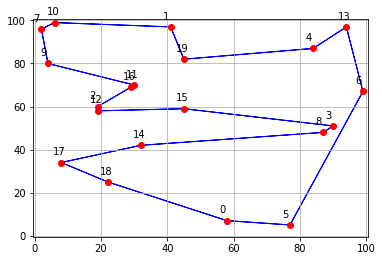

In [25]:
plot_tour(tsp_instance, grid_size, sol)

In [27]:
cost_value

498.6825759142915